## Creating graphs comparing different centrality measures with degree centrality

In [5]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np

In [6]:
G = nx.read_weighted_edgelist("yeast.txt",comments="#",nodetype=str)
threshold_score = 700
for edge in G.edges: 
    weight = list(G.get_edge_data(edge[0],edge[1]).values())
    if(weight[0] <= threshold_score):
        G.remove_edge(edge[0],edge[1])

Removing 4932

In [7]:
H = nx.relabel_nodes(G, lambda x: x[5:])

Getting the largest connected component

In [13]:
H_connected = max(nx.connected_components(H), key = len)
H0 = H.subgraph(H_connected)

Computing the centrality scores for all the nodes

In [14]:
degree_centrality = nx.degree_centrality(H)
eigenvector_centrality = nx.eigenvector_centrality(H)
closeness_centrality = nx.closeness_centrality(H)

In [16]:
betweeness = nx.betweenness_centrality(H)


In [18]:
subgraph = nx.subgraph_centrality(H)

Creating lists so we can plot

In [32]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
for key in degree_centrality.keys():
    degree_x.append(degree_centrality[key])
    eigen_y.append(eigenvector_centrality[key])
    closeness_y.append(closeness_centrality[key])
    betweeness_y.append(betweeness[key])
    subgraph_y.append(subgraph[key])



Plot of degree vs eigenvector centrality

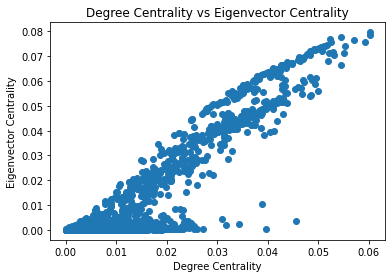

In [34]:
plt.scatter(degree_x, eigen_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality")
plt.show()

Plot of degree centrality vs closeness centrality

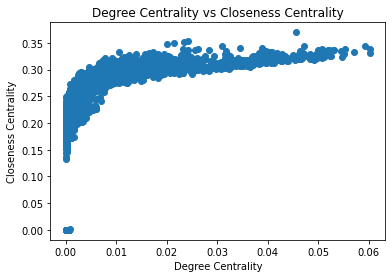

In [35]:
plt.scatter(degree_x, closeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality")
plt.show()

Degree centrality vs betweeness centrality

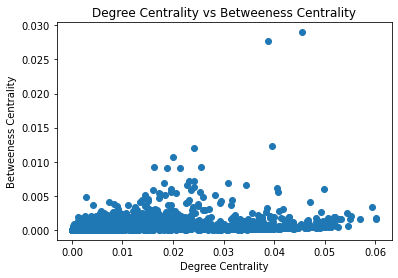

In [36]:
plt.scatter(degree_x, betweeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality")
plt.show()

Degree centrality vs subgraph centrality

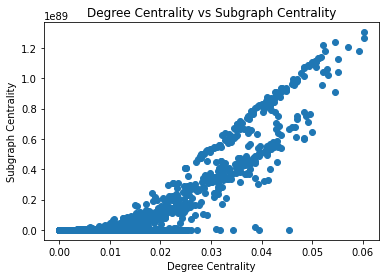

In [37]:
plt.scatter(degree_x, subgraph_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality")
plt.show()

Doing the same thing but now with the restricted graph

In [40]:
import pandas as pd
df = pd.read_csv("human_to_yeast.csv")
homologs = list(set(list(df["homolog_systematic_name"])))
H0 = H.subgraph(homologs).copy()

In [41]:
degree_centrality = nx.degree_centrality(H0)
eigenvector_centrality = nx.eigenvector_centrality(H0)
closeness_centrality = nx.closeness_centrality(H0)
betweeness = nx.betweenness_centrality(H0)
subgraph = nx.subgraph_centrality(H0)

In [47]:
eigen_y = []
closeness_y = []
betweeness_y = []
subgraph_y = []
degree_x = []
for key in degree_centrality.keys():
    degree_x.append(degree_centrality[key])
    eigen_y.append(eigenvector_centrality[key])
    closeness_y.append(closeness_centrality[key])
    betweeness_y.append(betweeness[key])
    subgraph_y.append(subgraph[key])

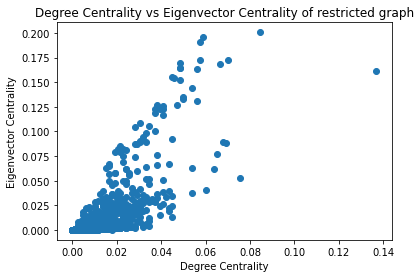

In [48]:
plt.scatter(degree_x, eigen_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Eigenvector Centrality")
plt.title("Degree Centrality vs Eigenvector Centrality of restricted graph")
plt.show()

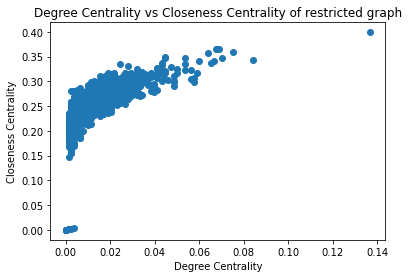

In [49]:
plt.scatter(degree_x, closeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Closeness Centrality")
plt.title("Degree Centrality vs Closeness Centrality of restricted graph")
plt.show()

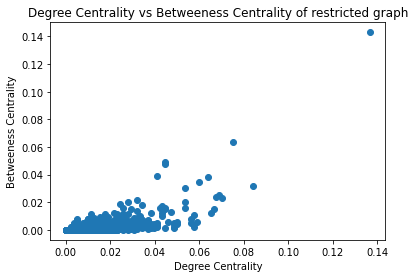

In [50]:
plt.scatter(degree_x, betweeness_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Betweeness Centrality")
plt.title("Degree Centrality vs Betweeness Centrality of restricted graph")
plt.show()

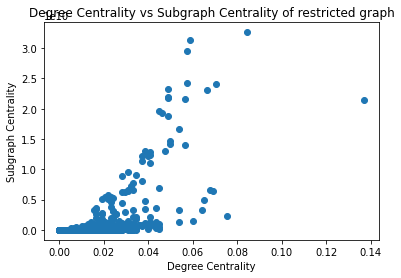

In [51]:
plt.scatter(degree_x, subgraph_y)
plt.xlabel("Degree Centrality")
plt.ylabel("Subgraph Centrality")
plt.title("Degree Centrality vs Subgraph Centrality of restricted graph")
plt.show()